In [4]:
import qutip as qt
import scqubits as scq
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
fluxonium = scq.Fluxonium(EJ = 8.9,
                               EC = 2.5,
                               EL = 0.5,
                               flux = 0.48,
                               cutoff = 110)

levels = 6

evals, evecs = fluxonium.eigensys(evals_count=levels)

n_op_energy_basis = qt.Qobj(fluxonium.process_op(fluxonium.n_operator(), energy_esys=(evals, evecs)))

H0 = qt.Qobj(np.diag(evals))

A = 0.1
drive_op = n_op_energy_basis

omega_d = evals[1] - evals[0]
H = [H0, [A * drive_op, 'cos(wd * t)']]
args = {'wd': omega_d}

drive_op

Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.+1.07838756e-17j 0.-5.20410568e-02j 0.-2.22638797e-01j
  0.-4.17687013e-01j 0.+4.24825374e-03j 0.-6.28748958e-02j]
 [0.+5.20410568e-02j 0.+9.84031091e-18j 0.+4.79485882e-01j
  0.-1.96197879e-01j 0.+7.39313106e-02j 0.+4.39799450e-02j]
 [0.+2.22638797e-01j 0.-4.79485882e-01j 0.-1.27968001e-18j
  0.+3.81301831e-01j 0.+4.30026592e-02j 0.-3.94097180e-02j]
 [0.+4.17687013e-01j 0.+1.96197879e-01j 0.-3.81301831e-01j
  0.-8.48860976e-19j 0.+4.75808155e-01j 0.+3.37475799e-01j]
 [0.-4.24825374e-03j 0.-7.39313106e-02j 0.-4.30026592e-02j
  0.-4.75808155e-01j 0.-8.66756086e-19j 0.-2.48046232e-01j]
 [0.+6.28748958e-02j 0.-4.39799450e-02j 0.+3.94097180e-02j
  0.-3.37475799e-01j 0.+2.48046232e-01j 0.-2.77347866e-17j]]

In [6]:
H

[Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
 Qobj data =
 [[-0.70018338  0.          0.          0.          0.          0.        ]
  [ 0.         -0.1893103   0.          0.          0.          0.        ]
  [ 0.          0.          8.75185302  0.          0.          0.        ]
  [ 0.          0.          0.         11.70704503  0.          0.        ]
  [ 0.          0.          0.          0.         16.50117828  0.        ]
  [ 0.          0.          0.          0.          0.         17.51911783]],
 [Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[0.+1.07838756e-18j 0.-5.20410568e-03j 0.-2.22638797e-02j
    0.-4.17687013e-02j 0.+4.24825374e-04j 0.-6.28748958e-03j]
   [0.+5.20410568e-03j 0.+9.84031091e-19j 0.+4.79485882e-02j
    0.-1.96197879e-02j 0.+7.39313106e-03j 0.+4.39799450e-03j]
   [0.+2.22638797e-02j 0.-4.79485882e-02j 0.-1.27968001e-19j
    0.+3.81301831e-02j 0.+4.3002659

In [7]:
is_hermitian = drive_op.isherm
print("drive_op is Hermitian:", is_hermitian)

drive_op is Hermitian: True


In [8]:
psi_initial = qt.basis(levels, 0)

psi_initial

Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [9]:
projectors = []

for i in range(levels):
    proj = qt.basis(levels, i) * qt.basis(levels, i).dag()
    projectors.append(proj)

# projectors

### times defined

In [10]:
times = np.linspace(0, 1000, 10000)

# options = qt.Options(nsteps=1000000, store_states=True, atol=1e-8, rtol=1e-6)
options = qt.Options(nsteps=1000000, store_states=True)


result_levels = qt.mesolve(
    H, psi_initial, times, [],
    projectors,
    args=args, options=options
)

result_levels

 c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\options.py: 16FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
 c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\solver_base.py: 576UserWarning: `cython`, `setuptools` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
 c:\Users\Owner\anaconda3\Lib\site-packages\qutip\core\coefficient.py: 423

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0029973983764648438
    preparation time: 0.003000974655151367
    run time: 1.0808203220367432
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 1000.0] (10000 steps)
  Number of e_ops: 6
  States saved.
>

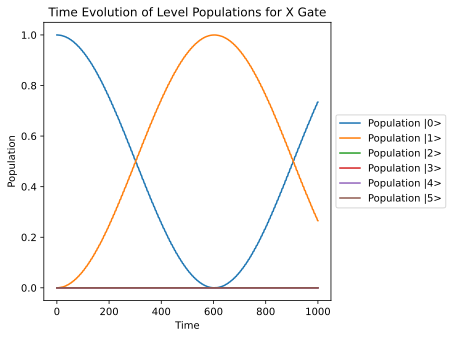

In [11]:
for i in range(levels):
    plt.plot(times, result_levels.expect[i], label=f'Population |{i}>')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Time Evolution of Level Populations for X Gate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  
plt.show()

## Timing

In [12]:
d01 = abs(n_op_energy_basis[0, 1])

rabi_freq = A * d01

tx = np.pi / rabi_freq

tx

603.6757989431644

 c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\solver_base.py: 576

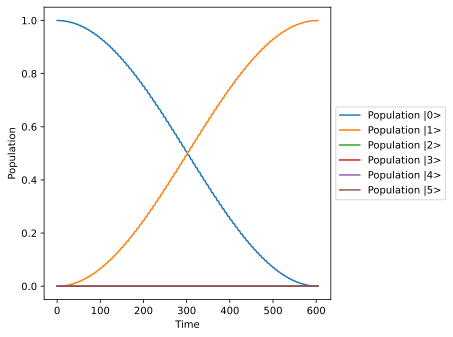

In [13]:
x_test_times = np.linspace(0, tx, 1000) 

result_levels_x_time = qt.mesolve(
    H, psi_initial, x_test_times, [],
    projectors,
    args=args, options=options
)

for i in range(levels):
    plt.plot(x_test_times, result_levels_x_time.expect[i], label=f'Population |{i}>')

plt.xlabel('Time')
plt.ylabel('Population')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  
plt.show()

## Fidelity

In [14]:
X_ideal = qt.sigmax()

X_ideal

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [15]:
U = qt.propagator(H, tx, args=args, options=options)

U

Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.10388939e-02+2.58298502e-04j  2.12029444e-01-9.77181428e-01j
  -3.55562451e-03-2.26581256e-03j  4.43756408e-03-2.53185827e-04j
  -4.21274837e-04-1.54520588e-04j -5.41414857e-04-7.65990721e-05j]
 [ 3.06916619e-01+9.51645066e-01j -1.09388536e-02+1.35107792e-03j
  -6.07819226e-03+3.39692808e-03j -1.79052499e-03+7.05867165e-04j
   2.60712331e-04-2.96064379e-04j -1.02224109e-04+7.81803276e-05j]
 [-6.25771344e-03+2.95530038e-03j  2.33098707e-03-3.58717433e-03j
   5.91680972e-01+8.05892495e-01j -7.07964539e-04-6.15749526e-03j
   7.88214164e-04-6.08684498e-04j -7.57601569e-04+2.85711469e-04j]
 [-1.93115241e-03+3.25949665e-04j -4.43757145e-03-1.47660304e-04j
   4.28107607e-03+4.45577179e-03j  2.47670253e-01+9.67771916e-01j
   1.54282189e-02-8.77512390e-03j  1.10336176e-02-1.64749213e-03j]
 [-3.94962341e-04+8.38839357e-05j -2.84865749e-04+3.19837982e-04j
  -6.96730912e-04+7.96679702e-04j -1.500

 c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\options.py: 16

Calculating propagators...


Calculating fidelity: 100%|██████████| 10000/10000 [00:00<00:00, 25320.05it/s]


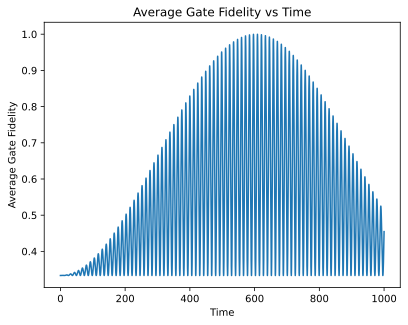

In [16]:
iterations = 10000

options = qt.Options(nsteps=1000000, store_states=True, atol=1e-12, rtol=1e-11)

print("Calculating propagators...")
P_list = qt.propagator(H, times, args=args, options=options)

fid_times = []
fid_values = []
for i, t in enumerate(tqdm(times, desc='Calculating fidelity')):
    U_t = P_list[i]
    U_2lvl = qt.Qobj(U_t.full()[:2, :2])
    fid = qt.average_gate_fidelity(U_2lvl, X_ideal)
    
    fid_times.append(t)
    fid_values.append(fid)

plt.plot(np.array(fid_times), np.array(fid_values))
plt.xlabel('Time')
plt.ylabel('Average Gate Fidelity')
plt.title('Average Gate Fidelity vs Time')
plt.show()

In [17]:
peak_fidelity = np.max(fid_values)
print("Peak average gate fidelity:", peak_fidelity)

peak_index = np.argmax(fid_values)
peak_time = times[peak_index]
print("Time at peak fidelity:", peak_time)

tx = peak_time

Peak average gate fidelity: 0.9997029388439721
Time at peak fidelity: 608.7608760876087


---------------------

## Noise

### Defining gamma

In [18]:
gamma_ij = {}
for j in range(1, levels):
    for i in range(j):
        t1 = fluxonium.t1_capacitive(j, i, Q_cap=1e5)
        if t1 is not None and t1 > 0:
            rate = 1.0 / t1
            gamma_ij[(i, j)] = rate
            gamma_ij[(j, i)] = rate  
gamma_ij

See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 c:\Users\Owner\anaconda3\Lib\site-packages\scqubits\core\noise.py: 1213

{(0, 1): 1.0105150256036662e-05,
 (1, 0): 1.0105150256036662e-05,
 (0, 2): 0.00012457805723540096,
 (2, 0): 0.00012457805723540096,
 (1, 2): 0.0005778185878582614,
 (2, 1): 0.0005778185878582614,
 (0, 3): 0.00043847193831442877,
 (3, 0): 0.00043847193831442877,
 (1, 3): 9.674498864173898e-05,
 (3, 1): 9.674498864173898e-05,
 (2, 3): 0.0003654648737811229,
 (3, 2): 0.0003654648737811229,
 (0, 4): 4.5358716542010955e-08,
 (4, 0): 4.5358716542010955e-08,
 (1, 4): 1.373715093941894e-05,
 (4, 1): 1.373715093941894e-05,
 (2, 4): 4.647618634468422e-06,
 (4, 2): 4.647618634468422e-06,
 (3, 4): 0.0005689889229704481,
 (4, 3): 0.0005689889229704481,
 (0, 5): 9.935607252458312e-06,
 (5, 0): 9.935607252458312e-06,
 (1, 5): 4.8612641906153375e-06,
 (5, 1): 4.8612641906153375e-06,
 (2, 5): 3.903431069544427e-06,
 (5, 2): 3.903431069544427e-06,
 (3, 5): 0.00028623658100727125,
 (5, 3): 0.00028623658100727125,
 (4, 5): 0.00016702026913130086,
 (5, 4): 0.00016702026913130086}

### Defining c_ops

In [19]:
c_ops = []
for (i, j), gamma in gamma_ij.items():
    # |i><j| operator
    cop = (np.sqrt(gamma)) * qt.basis(levels, i) * qt.basis(levels, j).dag()
    c_ops.append(cop)

c_ops

[Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=CSR, isherm=False
 Qobj data =
 [[0.         0.00317886 0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]],
 Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=CSR, isherm=False
 Qobj data =
 [[0.         0.         0.         0.         0.         0.        ]
  [0.00317886 0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.     

### Calculating the list of propagators

In [20]:
# times = np.linspace(0, 1000, iterations)

print("Calculating propagators...")
P_list = qt.propagator(H, times, c_ops=c_ops, args=args, options=options)

# P_list

Calculating propagators...


KeyboardInterrupt: 

In [ ]:
p_unitary = []

for i in range (len(P_list)):

    p_special = P_list[i]

    P_kraus_special = qt.to_kraus(p_special)

    p_special_2x2 = [qt.Qobj(k.full()[:2, :2]) for k in P_kraus_special]

    p_special_2x2_super = qt.kraus_to_super(p_special_2x2)

    p_unitary.append(p_special_2x2_super)

Calculating fidelity: 100%|██████████| 10000/10000 [00:00<00:00, 10220.24it/s]


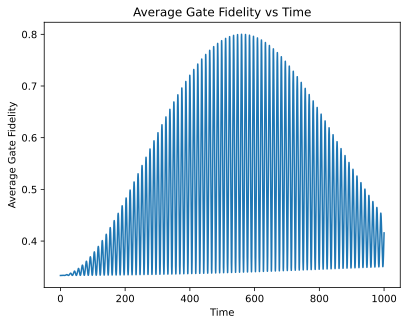

In [ ]:
fid_times = []
fid_values = []

for i, t in enumerate(tqdm(times, desc='Calculating fidelity')):
    # U_t = P_list[i]

    #testing
    fid = qt.average_gate_fidelity(p_unitary[i], X_ideal)
    
    fid_times.append(t)
    fid_values.append(fid)

plt.plot(np.array(fid_times), np.array(fid_values))
plt.xlabel('Time')
plt.ylabel('Average Gate Fidelity')
plt.title('Average Gate Fidelity vs Time')
plt.show()

In [ ]:
peak_fidelity_noise = np.max(fid_values)
print("Peak average gate fidelity:", peak_fidelity_noise)

peak_index_noise = np.argmax(fid_values)
peak_time_noise = times[peak_index_noise]
print("Time at peak fidelity:", peak_time_noise)

Peak average gate fidelity: 0.8000421174370086
Time at peak fidelity: 559.5559555955596


-----------

## Basic Optimization

### Making the arrays

In [ ]:
omega_d

0.5108730861240953

In [ ]:
omega_d_array = np.linspace(omega_d - 0.1, omega_d + 0.1, 20)

omega_d_array

array([0.41087309, 0.4213994 , 0.43192572, 0.44245203, 0.45297835,
       0.46350467, 0.47403098, 0.4845573 , 0.49508361, 0.50560993,
       0.51613624, 0.52666256, 0.53718888, 0.54771519, 0.55824151,
       0.56876782, 0.57929414, 0.58982045, 0.60034677, 0.61087309])

In [ ]:
print("Peak time", peak_time)

print("Peak time with noise", peak_time_noise)

Peak time 608.7608760876087
Peak time with noise 559.5559555955596


In [ ]:
t_g_array = np.linspace(0.8 * peak_time_noise, 1.2 * peak_time_noise, 20)

t_g_array

array([447.64476448, 459.42488986, 471.20501524, 482.98514062,
       494.765266  , 506.54539138, 518.32551676, 530.10564214,
       541.88576752, 553.66589291, 565.44601829, 577.22614367,
       589.00626905, 600.78639443, 612.56651981, 624.34664519,
       636.12677057, 647.90689595, 659.68702133, 671.46714671])

In [ ]:
import itertools
param_pairs = list(itertools.product(omega_d_array, t_g_array))

param_pairs

[(0.41087308612409534, 447.6447644764477),
 (0.41087308612409534, 459.4248898574068),
 (0.41087308612409534, 471.20501523836595),
 (0.41087308612409534, 482.98514061932514),
 (0.41087308612409534, 494.76526600028427),
 (0.41087308612409534, 506.5453913812434),
 (0.41087308612409534, 518.3255167622026),
 (0.41087308612409534, 530.1056421431617),
 (0.41087308612409534, 541.8857675241209),
 (0.41087308612409534, 553.66589290508),
 (0.41087308612409534, 565.4460182860391),
 (0.41087308612409534, 577.2261436669983),
 (0.41087308612409534, 589.0062690479574),
 (0.41087308612409534, 600.7863944289165),
 (0.41087308612409534, 612.5665198098757),
 (0.41087308612409534, 624.3466451908349),
 (0.41087308612409534, 636.126770571794),
 (0.41087308612409534, 647.9068959527532),
 (0.41087308612409534, 659.6870213337123),
 (0.41087308612409534, 671.4671467146715),
 (0.421399401913569, 447.6447644764477),
 (0.421399401913569, 459.4248898574068),
 (0.421399401913569, 471.20501523836595),
 (0.421399401913

### Function definition param map

In [ ]:
import itertools

def param_map(f, parameters, map_fun=map, dtype=object):
    """
    Maps function `f` over the product of the parameters given in `parameters`
    (which is assumed to have a list-of-lists-like structure). The returned data
    is an ndarray with dimensions set by the input data in `parameters`.

    e.g.:

    input_data_a=['1','2','3']
    input_data_b=['a','b']


    def f(a, b):
        return "{}{}".format(a,b)

    data=param_map(f, [input_data_a, input_data_b], map_fun=map)

    print(data.shape) #gives (3,2)
    print(data[0,0]) #gives '1a'

    Parameters
    ----------
    f:  function
        Function that is to be applied to each element of an array
    parameters: iterable of iterables (i.e. list of lists)

    Returns
    -------
    ndarray with f applied to products of input parameters
    """
    
    dims_list = [len(i) for i in parameters]
    total_dim = np.prod(dims_list)

    # all the possible combinations of input parameters
    parameters_prod = tuple(itertools.product(*parameters))

 

    # We want to force a 1d numpy array of size total_dim,
    # regardless what 'data' is, even if it's iterable
    # (list, sequence, etc), but by default, the np.array()
    # constructor will try to create new array dimensions
    # from objects that can be indexed (sequences, list, etc).
    data = np.empty(total_dim, dtype=dtype)
    for i, d in enumerate(map_fun(f, parameters_prod)):
        data[i] = d

    return np.reshape(data, dims_list)

### Function define evolve

In [ ]:
from itertools import product
from multiprocessing.dummy import Pool as ThreadPool

def evolve(omega_d, t_g):
    args = {'wd': omega_d}
    print("working")
    options = qt.Options(nsteps=10000000, store_states=True, atol=1e-12, rtol=1e-11)
    propagator = qt.propagator(H, t_g, args=args, options=options)
    propagator_kraus = qt.to_kraus(propagator)
    propagator_2x2 = [qt.Qobj(k.full()[:2, :2]) for k in propagator_kraus]
    p_2x2_super = qt.kraus_to_super(propagator_2x2)
    fidelity = qt.average_gate_fidelity(p_2x2_super, qt.sigmax())
    return fidelity    


def evolve_wrapped(params):
    omega_d, t_g = params
    return evolve(omega_d, t_g)

def multithreading(f, iterable):
    with ThreadPool() as pool:
        return pool.map(f, iterable)


---------------

### Peter Param map

In [ ]:
# !pip install --upgrade pathos

In [ ]:
import os

def parallel_map_qutip(task, values, task_args=tuple(), task_kwargs={}, **kwargs):
    """
    ---
    peterg NOTE: This is a modified parallel_map taken from qutip's source
    code. The version I would typically use, can break on some code that uses
    qutip's internal routines. This is likely due to some conflict with the
    openmp code (which the code below "turns off" via an environmental
    variable).  My slight modification is to to allow pathos (assumed imported
    as "mp") module to be used, as it handles pickle'ing various fancy objects
    much better.
    ---

 

 

    Parallel execution of a mapping of `values` to the function `task`. This
    is functionally equivalent to::

 

        result = [task(value, *task_args, **task_kwargs) for value in values]

 

    Parameters
    ----------
    task : a Python function
        The function that is to be called for each value in ``task_vec``.
    values : array / list
        The list or array of values for which the ``task`` function is to be
        evaluated.
    task_args : list / dictionary
        The optional additional argument to the ``task`` function.
    task_kwargs : list / dictionary
        The optional additional keyword argument to the ``task`` function.
    progress_bar : ProgressBar
        Progress bar class instance for showing progress.

 

    Returns
    --------
    result : list
        The result list contains the value of
        ``task(value, *task_args, **task_kwargs)`` for
        each value in ``values``.

 

    """
    os.environ["QUTIP_IN_PARALLEL"] = "TRUE"
    kw = _default_kwargs()
    if "num_cpus" in kwargs:
        kw["num_cpus"] = kwargs["num_cpus"]

 

    try:
        progress_bar = kwargs["progress_bar"]
        if progress_bar is True:
            progress_bar = TextProgressBar()
    except:
        progress_bar = BaseProgressBar()

 

    progress_bar.start(len(values))
    nfinished = [0]

 

    def _update_progress_bar(x):
        nfinished[0] += 1
        progress_bar.update(nfinished[0])

 

    try:
        pool = mp.Pool(processes=kw["num_cpus"])

 

        async_res = [
            pool.apply_async(
                task, (value,) + task_args, task_kwargs, _update_progress_bar
            )
            for value in values
        ]

 

        while not all([ar.ready() for ar in async_res]):
            for ar in async_res:
                ar.wait(timeout=0.1)

 

        pool.terminate()
        pool.join()

 

    except KeyboardInterrupt as e:
        os.environ["QUTIP_IN_PARALLEL"] = "FALSE"
        pool.terminate()
        pool.join()
        raise e

 

    progress_bar.finished()
    os.environ["QUTIP_IN_PARALLEL"] = "FALSE"
    return [ar.get() for ar in async_res]

In [ ]:
import os
from tqdm import tqdm

def _default_kwargs():
    return {"num_cpus": os.cpu_count() or 1}

def parallel_map_qutip_cleaned(task, values, task_args=tuple(), task_kwargs={}, **kwargs):
    """
    Parallel map with tqdm progress bar using pathos (mp) for multiprocessing.

    Parameters
    ----------
    task : function
        Function to apply to each element in `values`.
    values : list
        List of values to iterate over.
    task_args : tuple
        Extra positional args to pass to `task`.
    task_kwargs : dict
        Extra keyword args to pass to `task`.
    num_cpus : int (via kwargs)
        Number of parallel processes to use.

    Returns
    -------
    List of results from task(value, *task_args, **task_kwargs)
    """
    import pathos.multiprocessing as mp  # moved inside to avoid notebook import error

    os.environ["QUTIP_IN_PARALLEL"] = "TRUE"

    # Set number of CPUs
    kw = _default_kwargs()
    if "num_cpus" in kwargs:
        kw["num_cpus"] = kwargs["num_cpus"]

    # Create pool
    pool = mp.Pool(processes=kw["num_cpus"])

    try:
        # Wrap task with extra arguments
        def wrapped(val):
            return task(val, *task_args, **task_kwargs)

        # Run with tqdm for progress tracking
        results = list(tqdm(pool.imap(wrapped, values), total=len(values)))

        pool.close()
        pool.join()
    except KeyboardInterrupt as e:
        pool.terminate()
        pool.join()
        os.environ["QUTIP_IN_PARALLEL"] = "FALSE"
        raise e

    os.environ["QUTIP_IN_PARALLEL"] = "FALSE"
    return results


In [ ]:
# for parallel map
try:
    # pathos implementation is much more robust - should install if not present
    import pathos.multiprocessing as mp
except ImportError:
    # but default to std library version
    print(
        "using std lib version of multiprocessing; consider installing pathos; it's much more robust"
    )
    import multiprocessing as mp

In [ ]:
def varg_opt(data, axis=None, opt_fun=np.nanargmin):
    """
    Return an index of a (possibly) multi-dimensional array of the element that
    optimizes a given function along with the optimal value.
    """
    index = arg_opt(data, axis=axis, opt_fun=opt_fun)
    return index, data[index]

Note:  

so once you have run fidelity_results numpy array (i.e. NxM matrix... where each entry ij correspond to the fidelity for the ith value of the Omega_d_array and jth value of the t_g_array)... then you can run this function to get the optimal fidelity value and the corresponding indices. 

by default it will get the minimum, so you can pass to it 1-fidelity_results (which is actually defined as the error i.e. error=1-fidelity)

In [ ]:
from pathos.multiprocessing import ProcessingPool as Pool

In [ ]:
def evolve(omega_d, t_g):
    args = {'wd': omega_d}
    propagator = qt.propagator(H, t_g, args=args, options=options)
    propagator_kraus = qt.to_kraus(propagator)
    propagator_2x2 = [qt.Qobj(k.full()[:2, :2]) for k in propagator_kraus]
    p_2x2_super = qt.kraus_to_super(propagator_2x2)
    fidelity = qt.average_gate_fidelity(p_2x2_super, qt.sigmax())
    return fidelity

def evolve_try(omega_d, t_g):
    try:
        args = {'wd': omega_d}
        options = qt.Options(nsteps=10000000, store_states=True, atol=1e-12, rtol=1e-11)
        propagator = qt.propagator(H, t_g, args=args, options=options)
        propagator_kraus = qt.to_kraus(propagator)
        propagator_2x2 = [qt.Qobj(k.full()[:2, :2]) for k in propagator_kraus]
        p_2x2_super = qt.kraus_to_super(propagator_2x2)
        fidelity = qt.average_gate_fidelity(p_2x2_super, qt.sigmax())
        return fidelity
    except Exception as e:
        print(f"[⚠️] Error at omega_d={omega_d:.3f}, t_g={t_g:.3f}: {e}")
        return np.nan


def evolve_wrapped(params):
    omega_d, t_g = params
    return evolve(omega_d, t_g)

from fidelity_utils import evolve_wrapped

param_pairs = list(itertools.product(omega_d_array, t_g_array))

results_flat = parallel_map_qutip_cleaned(evolve_wrapped, param_pairs, num_cpus=4)
results = np.reshape(results_flat, (len(omega_d_array), len(t_g_array)))


100%|██████████| 400/400 [06:47<00:00,  1.02s/it]


In [ ]:
results

array([[0.33343339, 0.33335151, 0.33383512, 0.33458397, 0.33364634,
        0.33333783, 0.33342891, 0.33484386, 0.33514055, 0.33357222,
        0.33333335, 0.33374505, 0.33527191, 0.3344956 , 0.33335725,
        0.33333506, 0.33374837, 0.33447523, 0.33361291, 0.33340374],
       [0.3333414 , 0.33393917, 0.33461001, 0.3337041 , 0.33333763,
        0.33333902, 0.33429631, 0.33581632, 0.33459427, 0.33338391,
        0.33333982, 0.33410409, 0.33577183, 0.33483062, 0.33340983,
        0.33334851, 0.33349824, 0.33448755, 0.334263  , 0.33335351],
       [0.33426212, 0.33445177, 0.33353552, 0.33336074, 0.33333476,
        0.33402284, 0.33599419, 0.33579559, 0.33386504, 0.33333477,
        0.33340463, 0.33470543, 0.33646786, 0.3353103 , 0.33352954,
        0.33335643, 0.33335149, 0.33411463, 0.33485616, 0.33391049],
       [0.33384023, 0.33333355, 0.3334831 , 0.33333566, 0.33410312,
        0.33630895, 0.33674404, 0.33469383, 0.33341812, 0.33333342,
        0.3336817 , 0.3357035 , 0.33748291, 0

In [ ]:
# Find the indices of the maximum fidelity in the results array
max_idx = np.unravel_index(np.argmax(results), results.shape)
max_value = results[max_idx]
omega_d_best = omega_d_array[max_idx[0]]
t_g_best = t_g_array[max_idx[1]]

print(f"Best fidelity: {max_value}")
print(f"Found at omega_d = {omega_d_best}, t_g = {t_g_best}")
print(f"Indices in results array: {max_idx}")

Best fidelity: 0.6025624907944088
Found at omega_d = 0.5161362440188322, t_g = 530.1056421431617
Indices in results array: (10, 7)


In [ ]:
data = np.load('fidelity_scan_fluxonium.npz')
print(data.files)
for key in data.files:
    print(f"{key}: {data[key].shape}, dtype={data[key].dtype}")

FileNotFoundError: [Errno 2] No such file or directory: 'fidelity_scan_fluxonium.npz'

### Ignoring Parallel

In [ ]:
import qutip as qt
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt
import itertools
import warnings

In [ ]:
levels = 6
fluxonium = scq.Fluxonium(EJ=8.9, EC=2.5, EL=0.5, flux=0.48, cutoff=110)
c_ops = None  # will be initialized once

In [ ]:
def init_c_ops():
    gamma_ij = {}
    for j in range(1, levels):
        for i in range(j):
            t1 = fluxonium.t1_capacitive(j, i, Q_cap=1e5)
            if t1 is not None and t1 > 0:
                rate = 1.0 / t1
                gamma_ij[(i, j)] = rate
                gamma_ij[(j, i)] = rate
    c_ops_local = []
    for (i, j), gamma in gamma_ij.items():
        cop = np.sqrt(gamma) * qt.basis(levels, i) * qt.basis(levels, j).dag()
        c_ops_local.append(cop)
    return c_ops_local

In [ ]:
def evolve(omega_d, t_g):
    global c_ops
    if c_ops is None:
        c_ops = init_c_ops()

    # Use the same fluxonium as global for consistency
    evals, evecs = fluxonium.eigensys(evals_count=levels)
    n_op_energy_basis = qt.Qobj(fluxonium.process_op(fluxonium.n_operator(), energy_esys=(evals, evecs)))
    H0 = qt.Qobj(np.diag(evals))
    A = 0.1
    drive_op = n_op_energy_basis
    H = [H0, [A * drive_op, 'cos(wd * t)']]
    args = {'wd': omega_d}
    options = qt.Options(nsteps=1000000, store_states=True, atol=1e-10, rtol=1e-9)

    propagator = qt.propagator(H, t_g, args=args, options=options, c_ops=c_ops)
    propagator_kraus = qt.to_kraus(propagator)
    propagator_2x2 = [qt.Qobj(k.full()[:2, :2]) for k in propagator_kraus]
    p_2x2_super = qt.kraus_to_super(propagator_2x2)
    fidelity = qt.average_gate_fidelity(p_2x2_super, qt.sigmax())
    return fidelity

In [ ]:
if __name__ == "__main__":
    evals, _ = fluxonium.eigensys(evals_count=levels)
    omega_d_base = evals[1] - evals[0]

    # Define parameter grid
    omega_d_array = np.linspace(omega_d_base - 0.005, omega_d_base + 0.005, 10)
    peak_time_noise = 559.5559555955596  # previously determined
    t_g_array = np.linspace(0.99 * peak_time_noise, 1.01 * peak_time_noise, 10)
    param_pairs = list(itertools.product(omega_d_array, t_g_array))
    print(f"Total simulations to run: {len(param_pairs)}")

    # Run simulations serially
    results_flat = []
    for (omega_d, t_g) in param_pairs:
        print(f"Running: omega_d={omega_d:.5f}, t_g={t_g:.2f}")
        fidelity = evolve(omega_d, t_g)
        results_flat.append(fidelity)

    # Reshape results
    results = np.reshape(results_flat, (len(omega_d_array), len(t_g_array)))

    # Analyze
    max_idx = np.unravel_index(np.argmax(results), results.shape)
    max_value = results[max_idx]
    omega_d_best = omega_d_array[max_idx[0]]
    t_g_best = t_g_array[max_idx[1]]

    print("\n=== Final Results ===")
    print(f"Best fidelity: {max_value}")
    print(f"Found at omega_d = {omega_d_best}, t_g = {t_g_best}")
    print(f"Indices in results array: {max_idx}")

Total simulations to run: 100
Running: omega_d=0.50587, t_g=553.96
Running: omega_d=0.50587, t_g=555.20
Running: omega_d=0.50587, t_g=556.45
Running: omega_d=0.50587, t_g=557.69
Running: omega_d=0.50587, t_g=558.93
Running: omega_d=0.50587, t_g=560.18
Running: omega_d=0.50587, t_g=561.42
Running: omega_d=0.50587, t_g=562.66
Running: omega_d=0.50587, t_g=563.91
Running: omega_d=0.50587, t_g=565.15
Running: omega_d=0.50698, t_g=553.96
Running: omega_d=0.50698, t_g=555.20
Running: omega_d=0.50698, t_g=556.45
Running: omega_d=0.50698, t_g=557.69
Running: omega_d=0.50698, t_g=558.93
Running: omega_d=0.50698, t_g=560.18
Running: omega_d=0.50698, t_g=561.42
Running: omega_d=0.50698, t_g=562.66
Running: omega_d=0.50698, t_g=563.91
Running: omega_d=0.50698, t_g=565.15
Running: omega_d=0.50810, t_g=553.96
Running: omega_d=0.50810, t_g=555.20
Running: omega_d=0.50810, t_g=556.45
Running: omega_d=0.50810, t_g=557.69
Running: omega_d=0.50810, t_g=558.93
Running: omega_d=0.50810, t_g=560.18
Running:

In [ ]:
results

array([[0.52523415, 0.47208124, 0.40853384, 0.35835213, 0.33968728,
        0.3591294 , 0.40938583, 0.47124509, 0.52040035, 0.53740077],
       [0.52931675, 0.43935395, 0.36723689, 0.33970667, 0.36675957,
        0.43817766, 0.52673674, 0.59794726, 0.62373604, 0.59422138],
       [0.46944947, 0.37637306, 0.33973653, 0.37314647, 0.46386489,
        0.57722691, 0.66926976, 0.70387153, 0.66749802, 0.57474744],
       [0.38460934, 0.3398093 , 0.37708648, 0.48206882, 0.61439431,
        0.72280135, 0.7648827 , 0.72408477, 0.61645872, 0.48417066],
       [0.33995977, 0.37787508, 0.48970297, 0.6320822 , 0.74973634,
        0.79679514, 0.75472536, 0.63988576, 0.49718885, 0.382354  ],
       [0.37545328, 0.48565538, 0.62760485, 0.74592811, 0.79459354,
        0.75456979, 0.64127715, 0.49893579, 0.38337161, 0.33993373],
       [0.47095419, 0.60221675, 0.71262013, 0.75922886, 0.7240411 ,
        0.62061359, 0.48917929, 0.38138647, 0.33988767, 0.38105235],
       [0.56069483, 0.65596012, 0.6971820